# Title: SportsStats - Exploring Sports Data for Insightful News Stories

Description: This project concludes my "Learn SQL Basics for Data Science" specialization with UC Davis and showcases a dynamic Jupyter Notebook endeavor. In partnership with SportsStats, a well-known sports analysis firm, and their collaborators, including local news agencies and elite personal trainers, the project's focus is to find interesting insights and patterns from a comprehensive sports dataset.

Objective: The main goal of this project is to use SQL and data science tools to explore the detailed SportsStats dataset. The aim is to uncover interesting trends and patterns in sports-related data that can be turned into engaging news stories by local news agencies. Additionally, the project aims to discover valuable health-related insights to help elite personal trainers design tailored training plans for their clients.

Data Set: The project uses a large SportsStats dataset containing a variety of sports-related information. This dataset covers different sports, events, and regions, making it a valuable resource for drawing meaningful conclusions and insights that interest both news agencies and personal trainers.

Approach: The project involves using SQL queries and data exploration techniques to analyze the sports dataset. By looking for correlations, performance measures, and notable events, I aim to uncover interesting insights. The findings are then presented through visuals and simple explanations, making them easy to understand and engaging for readers.

# Hypotheses:

Over the years, there might have been a shift towards achieving a more equitable
representation of both female and male athletes in sports competitions.

Countries classified as developed are expected to have accumulated a greater
number of medals in their historical records compared to less developed nations.

Athletes around the age of 25 may demonstrate peak performance, which could lead
to an increased probability of winning medals in their respective events.

The geographical location of countries, particularly those situated at higher
latitudes, may have a significant impact on their Winter Sports performance,
resulting in a higher likelihood of winning medals.

There is a connection between a country's success in winter and summer Olympics


# Importing DataSet

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")


# Exploring DataSet

In [15]:
athlete_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [16]:
noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [17]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [18]:
noc_regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,SRI,Germany,North Borneo
freq,1,4,1


In [19]:
athlete_events.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN
96,33,Mika Lauri Aarnikka,M,24.0,187.0,76.0,Finland,FIN,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Men's Two Person Dinghy,NaN
97,33,Mika Lauri Aarnikka,M,28.0,187.0,76.0,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Men's Two Person Dinghy,NaN
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN


In [20]:
noc_regions.head(20)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [21]:
count = athlete_events['City'].nunique()
print(count)

42


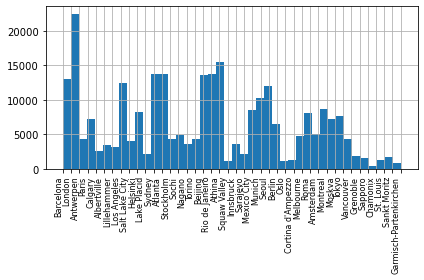

In [22]:
athlete_events['City'].hist(bins = 42)
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()


# Exploration of the dataset with SQL

In [23]:
pysqldf('''SELECT * 
           FROM athlete_events''')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [24]:
pysqldf('''SELECT age, COUNT(1) 
           FROM athlete_events 
           WHERE age IS NULL''')

,Age,COUNT(1)
0,None,9474


In [25]:
pysqldf('''SELECT AVG(age) 
           FROM athlete_events''')


,AVG(age)
0,25.556898


In [26]:
pysqldf('''SELECT AVG(weight) 
           FROM athlete_events''')

,AVG(weight)
0,70.702393


Out of 271116 data points, 9474 lack age value, 60171 lack height value, 62875 lack weight value. Sex values are complete. Games data and its attributes (year, city, etc.) are complete.Since team names can be changed, using NOC instead would prove more consistent.

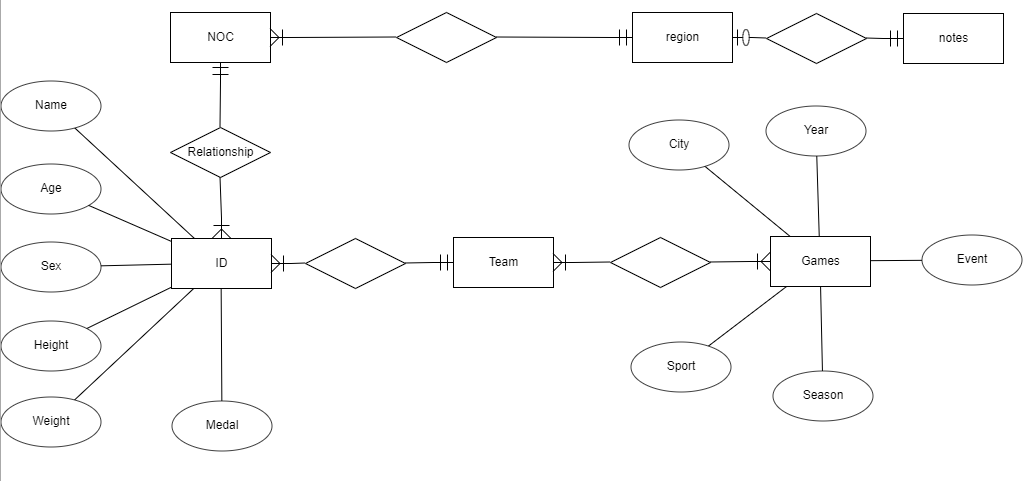

In [27]:
from IPython.display import Image
Image(filename = "ERD.png", width = 800, height = 400)

# Investigating the Relationship: Do Developed Countries Earn More Olympic Medals?


In [28]:
pysqldf('''SELECT Team,
                  NOC, 
                  COUNT(Medal) 
           FROM athlete_events
           WHERE Medal IS NOT NULL
           GROUP BY NOC 
           ORDER BY COUNT(Medal) DESC''').head(50)

,Team,NOC,COUNT(Medal)
0,United States,USA,5637
1,Soviet Union,URS,2503
2,Germany,GER,2165
3,Great Britain,GBR,2068
4,France,FRA,1777
5,Italy,ITA,1637
6,Sweden,SWE,1536
7,Canada,CAN,1352
8,Australia,AUS,1320
9,Russia,RUS,1165


Summary: Our analysis of historical Olympic medal counts by country indicates a pattern where developed nations such as the United States, Soviet Union, Germany, and Great Britain have consistently secured substantial medal counts. While this trend supports the hypothesis that developed countries accumulate more medals, it's crucial to recognize that various factors beyond development status contribute to these achievements. Further exploration is necessary to fully grasp the intricate interplay between a country's development and its success in the Olympics.

# Analyzing the Influence of Age on Medal-Winning Probability


In [29]:
pysqldf('''SELECT
           CASE WHEN Age BETWEEN 24 AND 26 THEN 'Around 25'
           ELSE 'Other Ages' END AS AgeGroup,
           COUNT(*) AS TotalAthletes,
           SUM(CASE WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS MedalWinners,
ROUND((CAST(SUM(CASE WHEN Medal IS NOT NULL THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*)) * 100, 2) AS MedalWinningPercentage
FROM
   athlete_events
GROUP BY
    AgeGroup;

''')

,AgeGroup,TotalAthletes,MedalWinners,MedalWinningPercentage
0,Around 25,59102,9337,15.80
1,Other Ages,212014,30446,14.36


Summary:
The analysis aimed to understand whether athletes around the age of 25 demonstrate a higher probability of winning medals in their respective events. The data was segmented into two age groups: "Around 25" (ages 24-26) and "Other Ages." The results revealed that athletes around 25 years old had a medal-winning percentage of 15.80%, while the medal-winning percentage for other age groups was 14.36%. This suggests that there is a slight increase in the likelihood of winning medals for athletes around the age of 25 compared to other age groups. This insight sheds light on the potential influence of age on peak athletic performance and success in competitive events.

In [30]:
pysqldf('''SELECT Games, COUNT(Games) 
            FROM athlete_events GROUP BY Games 
            ORDER BY COUNT(Games)''').head(50)

,Games,COUNT(Games)
0,1932 Winter,352
1,1896 Summer,380
2,1924 Winter,460
3,1928 Winter,582
4,1936 Winter,895
5,1948 Winter,1075
6,1952 Winter,1088
7,1960 Winter,1116
8,1904 Summer,1301
9,1956 Winter,1307


Aftering importing the data, and doing initial analysis on the data, the next step is to dividie the athelte_events table into winter and summer tables. 

In [31]:
summer_events = pysqldf('''SELECT * 
           FROM athlete_events 
           WHERE Season = 'Summer' ''')

In [32]:
winter_events = pysqldf('''SELECT * 
           FROM athlete_events 
           WHERE Season = 'Winter' ''')

# Ratio of Male and Female Athletes in Summer and Winter Games

In [33]:
pysqldf('''SELECT Sex, 
           COUNT(Sex) AS Athlete,
           (COUNT(*) * 100.0) / SUM(COUNT(*)) OVER() AS Ratio
           FROM summer_events
           GROUP BY Sex
           ''')

,Sex,Athlete,Ratio
0,F,59443,26.709713
1,M,163109,73.290287


In [34]:
pysqldf('''SELECT Sex, 
           COUNT(Sex) AS Athlete,
           (COUNT(*) * 100.0) / SUM(COUNT(*)) OVER() AS Ratio
           FROM winter_events
           GROUP BY Sex
           ''')

,Sex,Athlete,Ratio
0,F,15079,31.049749
1,M,33485,68.950251


As we can see the ratio between the Summer Olympics and the Winter Olympics is indeed different, men happen to be dominant. 

In [35]:
pysqldf('''SELECT Sex, 
           AVG(Weight),
           AVG(Age),
           AVG(Height)
           FROM summer_events
           GROUP BY Sex
           ''')

,Sex,AVG(Weight),AVG(Age),AVG(Height)
0,F,60.087644,23.660997,168.169025
1,M,75.604195,26.443944,178.901874


In [36]:
pysqldf('''SELECT Sex, 
           AVG(Weight),
           AVG(Age),
           AVG(Height)
           FROM winter_events
           GROUP BY Sex
           ''')

,Sex,AVG(Weight),AVG(Age),AVG(Height)
0,F,59.755156,24.014398,166.528250
1,M,76.357058,25.504261,178.668699


Sex Differences:
The data shows that there are notable differences between male and female participants across various attributes, including height, weight, and age. These differences are expected due to biological factors.

Age Consideration:
While the height and weight differences can be attributed to biological factors, the age difference might have additional factors at play. It's essential to explore social factors and potential cultural influences that contribute to the age disparity.

Social Factors:
The analysis suggests that the age variations might not be solely due to natural processes but could involve societal factors. Social factors such as participation rates, career timing, and societal expectations could contribute to the observed differences in ages between male and female participants.

Seasonal Age Gap:
The observation of a smaller age gap in the Winter Olympics (~2.8 years for males and ~1.5 years for females) compared to the Summer Olympics might indicate distinct trends in athlete selection or career longevity between the two events.

# Decoding Olympic Success: Unraveling Medal Patterns

Digging deeper, I've taken a closer look at medal ratios. By studying the distribution of overall medals and changes in different medal ratios, I aim to uncover hidden insights. This exploration is important because it helps us understand how Olympic achievements have transformed over the years. Through this analysis, I'm seeking to grasp how different factors have influenced the way medals are awarded, offering a glimpse into the evolving landscape of athlete accomplishments.

In [37]:
pysqldf('''SELECT Sex,Medal,count(Medal) AS medal_count
           FROM summer_events
           WHERE Medal IS NOT NULL
           GROUP BY Medal,Sex
           ''')

,Sex,Medal,medal_count
0,F,Bronze,3174
1,M,Bronze,8235
2,F,Gold,3140
3,M,Gold,8319
4,F,Silver,3128
5,M,Silver,8092


In [38]:
pysqldf('''SELECT Sex,Medal,count(Medal) AS medal_count
           FROM winter_events
            WHERE Medal IS NOT NULL
           GROUP BY Medal,Sex
           ''')

,Sex,Medal,medal_count
0,F,Bronze,597
1,M,Bronze,1289
2,F,Gold,607
3,M,Gold,1306
4,F,Silver,607
5,M,Silver,1289


In [39]:

summer_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY Year 
                        )
                       ''')

In [40]:
winter_medals = pysqldf('''
        SELECT
              Year,
              CAST(medal_count AS FLOAT)/ total_count AS medal_ratio,
              CAST(gold_count AS FLOAT)/ medal_count AS gold_ratio,
              CAST(silver_count AS FLOAT)/ medal_count AS silver_ratio,
              CAST(bronze_count AS FLOAT)/ medal_count AS bronze_ratio
          FROM
        (
                SELECT 
                  Year,
                  COUNT(*) AS total_count,
                  SUM(CASE
                        WHEN Medal IS NOT NULL THEN 1 ELSE 0 
                      END) AS medal_count,
                  SUM(CASE
                        WHEN Medal = "Gold" THEN 1 ELSE 0 
                      END) AS gold_count,
                  SUM(CASE
                        WHEN Medal = "Silver" THEN 1 ELSE 0 
                      END) AS silver_count,
                  SUM(CASE
                        WHEN Medal = "Bronze" THEN 1 ELSE 0 
                      END) AS bronze_count
                  FROM winter_events
                  GROUP BY Year
                  
                )
            ''')

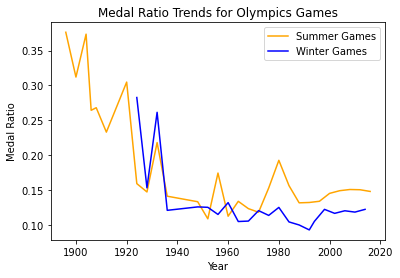

In [41]:
plt.plot(summer_medals.Year,summer_medals.medal_ratio, color = "Orange", label = "Summer Games")
plt.plot(winter_medals.Year,winter_medals.medal_ratio, color = "Blue", label = "Winter Games")
plt.xlabel("Year") 
plt.ylabel("Medal Ratio")
plt.legend()
plt.title("Medal Ratio Trends for Olympics Games")
plt.show()

# Summary: Insights from Medal Ratio Trends in Winter and Summer Games

The medal ratio trends in both Winter and Summer Games over the last century reveal intriguing insights:

Stabilization of Performance:The fluctuating medal ratios eventually stabilized, indicating the establishment of performance norms and standards in both competitions.

Cyclic Patterns:Cyclic patterns in the ratios suggest recurring phases of strong and weak performances, potentially influenced by changing training techniques and geopolitical events.

Impact of Global Events: Notable world events like World Wars impacted athlete participation and performance, leading to shifts in medal ratios.

Evolution of Competition: Fluctuations may reflect changing competitive landscapes, with certain countries or regions dominating during specific eras.

Socioeconomic Influence: Socioeconomic factors, technological advancements, and athlete development programs contributed to variations in performance levels.

Host Country Effect: Medal ratios could be influenced by host countries' preparations, emphasis on specific sports, and home-field advantage.

Economic and Technological Progress:Advancements in athlete training methods, nutrition, and equipment influenced overall performance levels.

Long-Term Trends: An analysis of trends over time could identify periods of significant performance shifts, offering insights into broader sports developments.

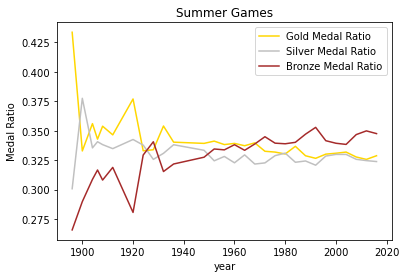

In [42]:
plt.plot(summer_medals.Year,summer_medals.gold_ratio, color = "gold", label = "Gold Medal Ratio")
plt.plot(summer_medals.Year,summer_medals.silver_ratio, color = "silver", label = "Silver Medal Ratio")
plt.plot(summer_medals.Year,summer_medals.bronze_ratio, color = "brown", label = "Bronze Medal Ratio")
plt.legend()
plt.title("Summer Games")
plt.xlabel("year")
plt.ylabel("Medal Ratio")
plt.show()

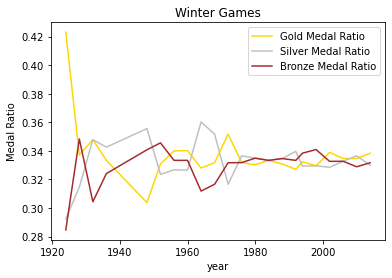

In [43]:
plt.plot(winter_medals.Year,winter_medals.gold_ratio, color = "gold", label = "Gold Medal Ratio")
plt.plot(winter_medals.Year,winter_medals.silver_ratio, color = "silver", label = "Silver Medal Ratio")
plt.plot(winter_medals.Year,winter_medals.bronze_ratio, color = "brown", label = "Bronze Medal Ratio")
plt.legend()
plt.title("Winter Games")
plt.xlabel("year")
plt.ylabel("Medal Ratio")
plt.show()

# The stabilization of medal ratios:

The proportions of gold, silver, and bronze medals have also reached a state of stability. The stabilization of medal ratios suggests the establishment of consistent performance norms and benchmarks within both the Winter and Summer Games. Over time, athletes and their respective countries may have refined training techniques, adopted standardized practices, and developed strategies that led to more predictable and balanced medal distributions. This phenomenon reflects a level of equilibrium and uniformity in performance expectations, contributing to the stability of medal ratios observed.

# The ratio of women to men has Increased OR Decreased?

In [44]:
f_to_m_ratio_summers = pysqldf('''
          SELECT Year,
                CAST(female_count AS FLOAT)/ male_count AS Ratio
           FROM(
           SELECT 
              Year,
              SUM(CASE WHEN Sex = 'F' THEN 1 ELSE 0
              END) AS female_count,
              SUM(CASE WHEN Sex = 'M' THEN 1 ELSE 0
              END) AS male_count
              FROM summer_events
              GROUP BY Year
             )
''')

In [45]:
f_to_m_ratio_winters = pysqldf('''
          SELECT Year,
                CAST(female_count AS FLOAT)/ male_count AS Ratio
           FROM(
           SELECT 
              Year,
              SUM(CASE WHEN Sex = 'F' THEN 1 ELSE 0
              END) AS female_count,
              SUM(CASE WHEN Sex = 'M' THEN 1 ELSE 0
              END) AS male_count
              FROM winter_events
              GROUP BY Year
             )
''')

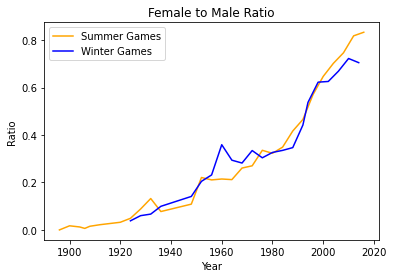

In [46]:
plt.plot(f_to_m_ratio_summers.Year,f_to_m_ratio_summers.Ratio, color = "Orange", label = "Summer Games")
plt.plot(f_to_m_ratio_winters.Year,f_to_m_ratio_winters.Ratio, color = "Blue", label = "Winter Games")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.legend()
plt.title("Female to Male Ratio")
plt.show()

The change in the ratio of women to men in Olympic participation suggests that Over the years, the ratio of  women to men has shown an increasing trend. However, a noteworthy observation is that during the Second World War, there was a significant decline in the proportion of women participating in the Summer Olympics. Nevertheless, the ratio subsequently resumed its upward trajectory. While this pattern is evident, further analysis is required to fully understand the underlying reasons behind this phenomenon.

# Calculating Pearson Correlation Coefficient between Total Winter and Summer Olympic Medals

1- Calculate the total number of medals for each year in both the Winter and Summer Olympics.                                    
2- Compute the Pearson correlation coefficient between these two sets of total medal counts.

In [47]:
summer_medal_by_year = pysqldf('''
          SELECT 
                  Year,
                  COUNT(*) AS total_count,
                  SUM(CASE
                        WHEN Medal IS NOT NULL THEN 1 ELSE 0 
                      END) AS medal_count,
                  SUM(CASE
                        WHEN Medal = "Gold" THEN 1 ELSE 0 
                      END) AS gold_count,
                  SUM(CASE
                        WHEN Medal = "Silver" THEN 1 ELSE 0 
                      END) AS silver_count,
                  SUM(CASE
                        WHEN Medal = "Bronze" THEN 1 ELSE 0 
                      END) AS bronze_count
                  FROM summer_events
                  GROUP BY Year
''')

In [48]:
winter_medal_by_year = pysqldf('''
          SELECT 
                  Year,
                  COUNT(*) AS total_count,
                  SUM(CASE
                        WHEN Medal IS NOT NULL THEN 1 ELSE 0 
                      END) AS medal_count,
                  SUM(CASE
                        WHEN Medal = "Gold" THEN 1 ELSE 0 
                      END) AS gold_count,
                  SUM(CASE
                        WHEN Medal = "Silver" THEN 1 ELSE 0 
                      END) AS silver_count,
                  SUM(CASE
                        WHEN Medal = "Bronze" THEN 1 ELSE 0 
                      END) AS bronze_count
                  FROM winter_events
                  GROUP BY Year
''')

In [49]:
print(summer_medal_by_year.head(10))

   Year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1896          380          143          62            43            38
1  1900         1936          604         201           228           175
2  1904         1301          486         173           163           150
3  1906         1733          458         157           156           145
4  1908         3101          831         294           281           256
5  1912         4040          941         326           315           300
6  1920         4292         1308         493           448           367
7  1924         5233          832         277           281           274
8  1928         4992          734         245           239           250
9  1932         2969          647         229           214           204


In [50]:
print(winter_medal_by_year.head(10))

   Year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1924          460          130          55            38            37
1  1928          582           89          30            28            31
2  1932          352           92          32            32            28
3  1936          895          108          36            37            35
4  1948         1075          135          41            48            46
5  1952         1088          136          45            44            47
6  1956         1307          150          51            49            50
7  1960         1116          147          50            48            49
8  1964         1778          186          61            67            58
9  1968         1891          199          66            70            63


Because the Winter Olympics began in 1924, while the Summer Olympics started back in 1896, there's a difference in the lengths of the arrays that show medal counts. To address this, I need to create a new table that only includes Summer Olympics data starting from 1924. This way, both datasets will have matching lengths, making it easier to compare the medal counts between Winter and Summer Olympics effectively.

In [51]:
summer_medal_by_year_1 = summer_medal_by_year[7:]

In [52]:
print(summer_medal_by_year_1.head(10))

    Year  total_count  medal_count  gold_count  silver_count  bronze_count
7   1924         5233          832         277           281           274
8   1928         4992          734         245           239           250
9   1932         2969          647         229           214           204
10  1936         6506          917         312           310           295
11  1948         6405          852         289           284           279
12  1952         8270          897         306           291           300
13  1956         5127          893         302           293           298
14  1960         8119          911         309           294           308
15  1964         7702         1029         347           339           343
16  1968         8588         1057         359           340           358


Now second step is to calculate the Pearon correlation coefficient between the total number of medals in the winter and summer olympics from 1924 to 2016.

In [53]:
x = summer_medal_by_year_1.medal_count
y = winter_medal_by_year.medal_count
correlation_coefficient = np.corrcoef(x,y)

print("Pearson Correlation Coefficient:\n", correlation_coefficient)

Pearson Correlation Coefficient:
 [[1.         0.94141801]
 [0.94141801 1.        ]]


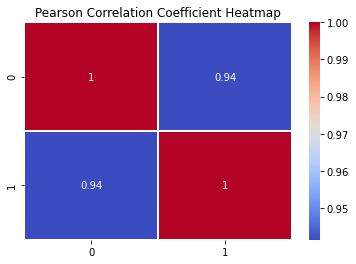

In [54]:
sns.heatmap(correlation_coefficient, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Coefficient Heatmap")
plt.show()

The Pearson Correlation Coefficient matrix reveals a robust positive correlation of around 0.9414 between a country's performance in the Winter Olympics and its performance in the Summer Olympics. This indicates that how well a country performs in one type of Olympics tends to be closely linked to its performance in the other type. However, it's essential to note that correlation doesn't imply causation, and additional investigation is needed to understand the factors driving this connection.

In [55]:
summer_std = np.std(x)
winter_std = np.std(y)

In [56]:
print("standard deviation of summer's medal count: ",summer_std)
print("standard deviation of winter's medal count: ",winter_std)

standard deviation of summer's medal count:  475.323015441357
standard deviation of winter's medal count:  152.56899942903493


From 1924 to 2016, we observed that the standard deviation of medal counts in the Summer Olympics is approximately three times larger than that in the Winter Olympics. This indicates that the performance of countries by year tends to exhibit greater variation in the Summer Olympics compared to the Winter Olympics. The wider spread of data points in the Summer Olympics suggests more pronounced fluctuations in medal counts over the years, reflecting a potentially more dynamic and competitive landscape in those games.